In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [74]:
plt.style.use('seaborn-v0_8-pastel')

In [75]:
cars_data = pd.read_excel("data/Cars_Data_full.xlsx")

In [76]:
cars_data.head()

,Price,Age,KM,Fuel,HP,MC,Color,Auto,CC,Drs,...,AC,Comp,CD,Clock,Pwin,PStr,Radio,SpM,M_Rim,Tow_Bar
0,21000,26,31463,Petrol,195,0,Silver,0,1800,3,...,1,0,1,1,1,1,0,0,1,0
1,20000,23,43612,Petrol,195,0,Red,0,1800,3,...,1,1,0,1,1,1,0,1,1,0
2,19650,26,32191,Petrol,195,0,Red,0,1800,3,...,1,1,0,1,1,1,0,1,1,0
3,21550,32,23002,Petrol,195,1,Black,0,1800,3,...,1,1,1,1,1,1,0,1,1,0
4,22550,33,34133,Petrol,195,1,Grey,0,1800,3,...,1,1,1,1,1,1,0,1,1,0


In [77]:
cars_data.shape

(1367, 28)

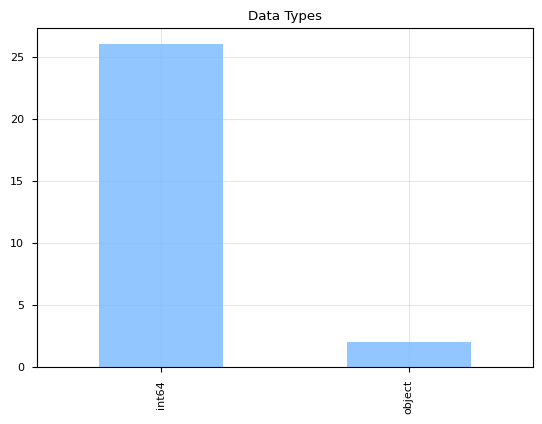

In [78]:
ax = cars_data.dtypes.value_counts().plot(kind='bar')
ax.set_title("Data Types")
ax.grid(alpha=0.3)

Text(0.5, 1.0, 'Price Distribution')

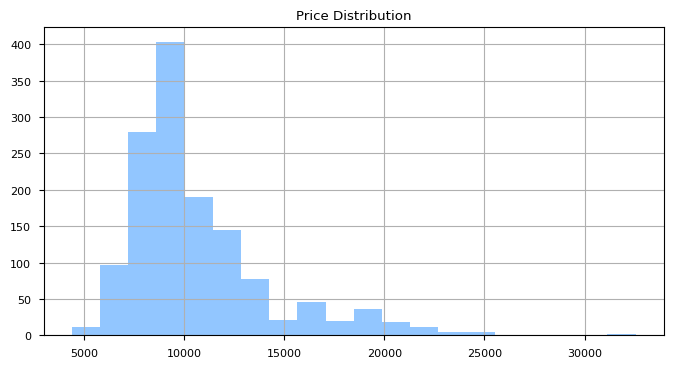

In [79]:
ax = cars_data['Price'].hist(bins=20, figsize=(8, 4))
ax.set_title("Price Distribution")


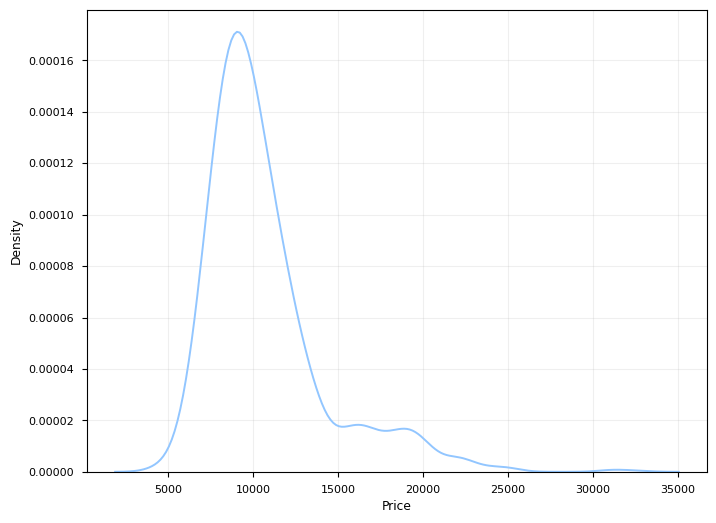

In [80]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(cars_data['Price'], ax=ax)
ax.grid(alpha=0.2)

In [81]:
cars_data['Price'].describe()

count     1367.000000
mean     10682.416971
std       3555.986256
min       4400.000000
25%       8500.000000
50%       9945.000000
75%      11800.000000
max      32550.000000
Name: Price, dtype: float64

## Outliers

Data contains some substantial outliers on both tail ends. 

- 1st pecentile is about 6000

- 99th percentile is about 22000

Setting data within those bounds

In [82]:
# anything at/above the 99th percentile should be dropped
cars_data['Price'].quantile(q=[0.0, 0.01, 0.05, 0.9, 0.95, 0.99])

0.00     4400.0
0.01     5983.0
0.05     6950.0
0.90    16000.0
0.95    18920.0
0.99    22300.0
Name: Price, dtype: float64

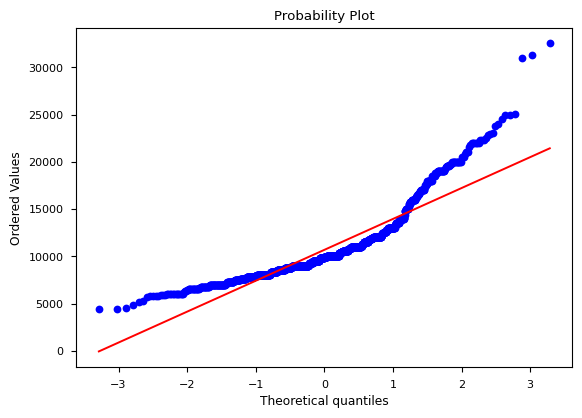

In [83]:
fig, ax = plt.subplots()

measurements = cars_data['Price'].sort_values()
stats.probplot(measurements, dist="norm", plot=ax)
plt.show()

In [84]:
y = cars_data.loc[(cars_data['Price'] > 6000.0) & (cars_data['Price'] < 22000.0), 'Price']


In [85]:
y.describe()

count     1319.000000
mean     10555.733889
std       3060.508324
min       6050.000000
25%       8545.000000
50%       9950.000000
75%      11747.500000
max      21800.000000
Name: Price, dtype: float64

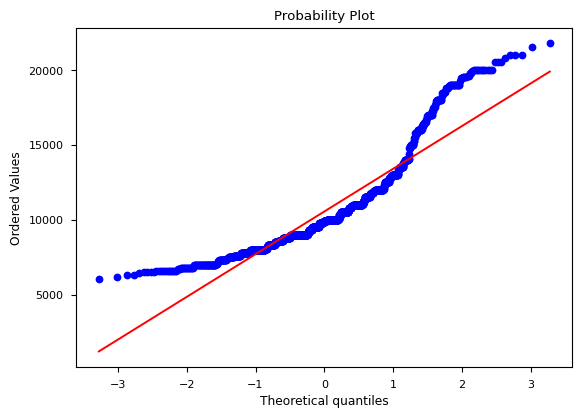

In [86]:
fig, ax = plt.subplots()
stats.probplot(y, dist="norm", plot=ax)
plt.show()

In [87]:
numerical_features = cars_data.columns[cars_data.dtypes.apply(lambda x: x in ('int64', 'float64'))]
categorical_features = cars_data.columns[cars_data.dtypes.apply(lambda x: x == 'object')]

In [88]:
# non-parametric correlation
corr_mat = cars_data[numerical_features].corr(method='kendall')
corr_mat.drop('Price', inplace=True)

Text(0, 0.5, 'Correlation')

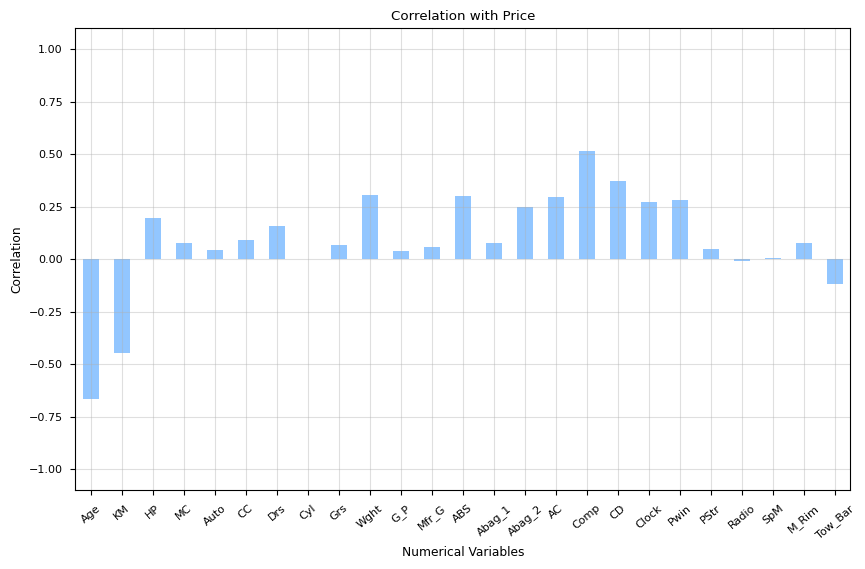

In [89]:
ax = corr_mat['Price'].plot(kind='bar', figsize=(10, 6))
ax.set_ylim(-1.1, 1.1)
ax.grid(alpha=0.4)
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(40)

ax.set_title("Correlation with Price")
ax.set_xlabel("Numerical Variables")
ax.set_ylabel("Correlation")

## Correlation

Most numerical features don't show a significant correlation (positive or negative) with Price :(

During modeling, I will only use numerical features with a correlation above 0.1

- 'Age', 'KM', 'HP', 'Drs', 'Wght', 'ABS', 'Abag_2', 'AC', 'Comp', 'CD', 'Clock', 'Pwin', 'Tow_Bar'

In [108]:
corr_mat['Price'][corr_mat['Price'].abs() > 0.1].index

Index(['Age', 'KM', 'HP', 'Drs', 'Wght', 'ABS', 'Abag_2', 'AC', 'Comp', 'CD',
       'Clock', 'Pwin', 'Tow_Bar'],
      dtype='object')

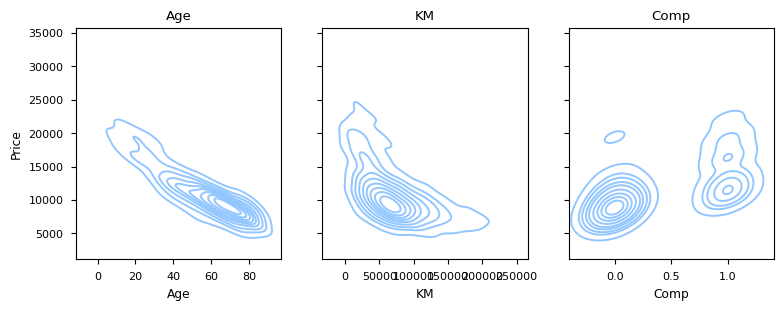

In [100]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

for i, ax in enumerate(axes):
    col = corr_mat['Price'][corr_mat['Price'].abs() > 0.4].index[i]
    sns.kdeplot(data=cars_data, x=col, y='Price', ax=ax)
    ax.set_title("{}".format(col))

# Set the subplots to overlap
f.subplots_adjust(hspace=1)

## Some numerical variables are categorical

Find the categorical features

In [103]:
cars_data[numerical_features].apply(lambda x: x.unique().shape[0])

Price       229
Age          74
KM         1208
HP           12
MC            2
Auto          2
CC           13
Drs           4
Cyl           1
Grs           4
Wght         49
G_P           3
Mfr_G         2
ABS           2
Abag_1        2
Abag_2        2
AC            2
Comp          2
CD            2
Clock         2
Pwin          2
PStr          2
Radio         2
SpM           2
M_Rim         2
Tow_Bar       2
dtype: int64

<Axes: title={'center': 'Price'}, xlabel='Comp'>

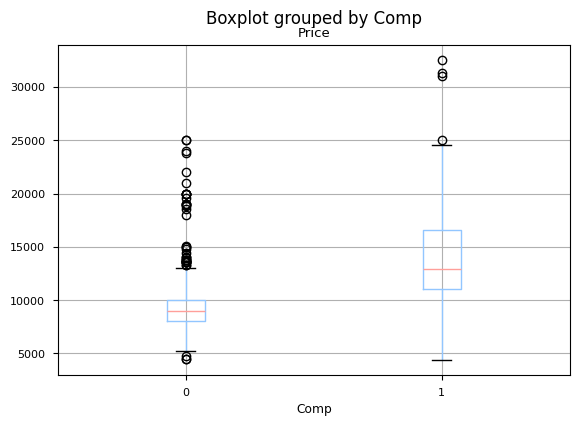

In [105]:
cars_data.boxplot(column='Price', by = 'Comp')

<Axes: title={'center': 'Price'}, xlabel='PStr'>

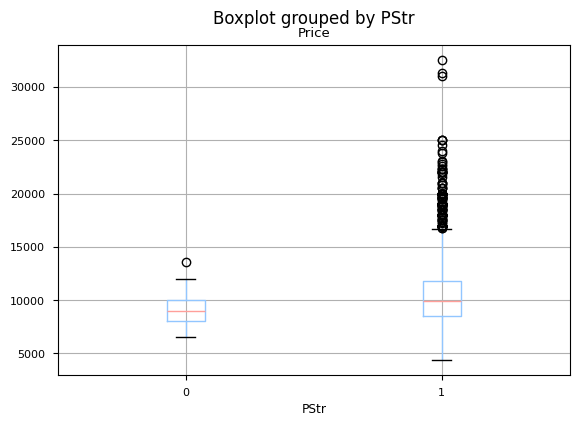

In [107]:
cars_data.boxplot(column='Price', by = 'PStr')

<Axes: title={'center': 'Price'}, xlabel='CD'>

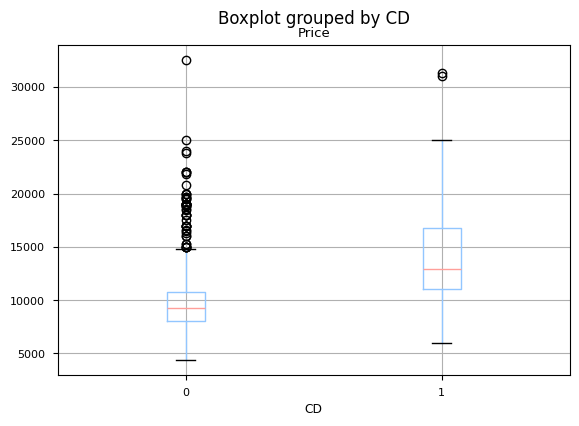

In [106]:
cars_data.boxplot(column='Price', by = 'CD')

In [ ]:
cars_data['Fuel'].value_counts()

Fuel
Petrol    1225
Diesel     142
Name: count, dtype: int64

<Axes: title={'center': 'Price'}, xlabel='Fuel'>

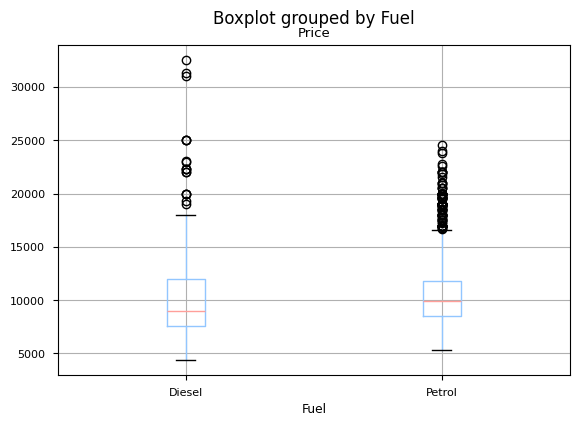

In [ ]:
cars_data.boxplot(column='Price', by = 'Fuel')

In [ ]:
cars_data['Color'].value_counts()

Color
Grey      290
Red       267
Blue      266
Green     215
Black     179
Silver    120
White      27
Yellow      3
Name: count, dtype: int64

<Axes: title={'center': 'Price'}, xlabel='Color'>

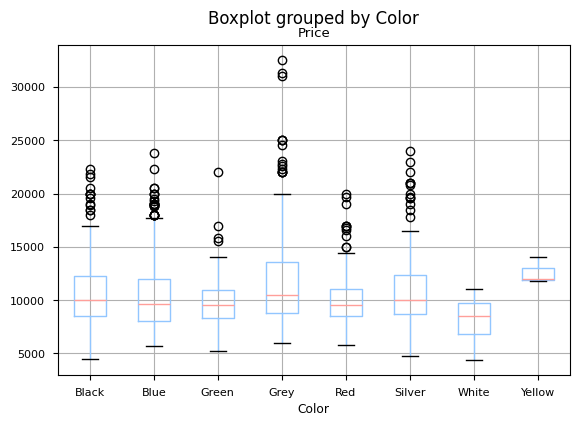

In [ ]:
cars_data.boxplot(column='Price', by = 'Color')

# Conclusions

Only a small sample of features are informative. The rest are kinda meh...

The distribution of Price is also slightly bimodal with a slight cluster forming around higher priced vehicles